#  IBM Data Science Capstone Project

## Project Goal
We aim to predict the severity of accidents by training and testing traffic data sets   

In [1]:
import pandas as pd
import numpy as np

In [2]:
print(" Hello Capstone Project Course!")

 Hello Capstone Project Course!


## Introduction/Business Problem
We want to study the traffic collisions data set to better understand and forecast the severity of certain accidents given the conditions such as weather and road conditions. Having this estimate will help the medical team get to the needed as well as guiding the other drivers to a faster route.

## Data
The data set we are using here is from ArcGIS Metadata Form. It has 37 columns and 194672 entries. It includes all types of collisions in Seattle. Collisions will display at the intersection or mid-block of a segment. The timeframe is 2004 to Present.  

I will be building and testing different types of machine learning models to find the best fit for this scenario. The models I will be exploring includes regression model, logistic regression model, classification model.


In [3]:
df=pd.read_csv("Data-Collisions.csv")

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [5]:
#data cleaning 
df1=df.drop(['INCDATE','SEVERITYCODE.1','REPORTNO','OBJECTID','EXCEPTRSNCODE','EXCEPTRSNDESC','X','Y','INCKEY','INTKEY','COLDETKEY','SEVERITYDESC','INCDTTM','SDOT_COLCODE','SDOT_COLDESC','SDOTCOLNUM','ST_COLCODE','ST_COLDESC','SEGLANEKEY','CROSSWALKKEY'], axis=1)
df1.info()
df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   SEVERITYCODE    194673 non-null  int64 
 1   STATUS          194673 non-null  object
 2   ADDRTYPE        192747 non-null  object
 3   LOCATION        191996 non-null  object
 4   COLLISIONTYPE   189769 non-null  object
 5   PERSONCOUNT     194673 non-null  int64 
 6   PEDCOUNT        194673 non-null  int64 
 7   PEDCYLCOUNT     194673 non-null  int64 
 8   VEHCOUNT        194673 non-null  int64 
 9   JUNCTIONTYPE    188344 non-null  object
 10  INATTENTIONIND  29805 non-null   object
 11  UNDERINFL       189789 non-null  object
 12  WEATHER         189592 non-null  object
 13  ROADCOND        189661 non-null  object
 14  LIGHTCOND       189503 non-null  object
 15  PEDROWNOTGRNT   4667 non-null    object
 16  SPEEDING        9333 non-null    object
 17  HITPARKEDCAR    194673 non-nu

,SEVERITYCODE,STATUS,ADDRTYPE,LOCATION,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR
0,2,Matched,Intersection,5TH AVE NE AND NE 103RD ST,Angles,2,0,0,2,At Intersection (intersection related),NaN,N,Overcast,Wet,Daylight,NaN,NaN,N
1,1,Matched,Block,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,Sideswipe,2,0,0,2,Mid-Block (not related to intersection),NaN,0,Raining,Wet,Dark - Street Lights On,NaN,NaN,N
2,1,Matched,Block,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,Parked Car,4,0,0,3,Mid-Block (not related to intersection),NaN,0,Overcast,Dry,Daylight,NaN,NaN,N
3,1,Matched,Block,2ND AVE BETWEEN MARION ST AND MADISON ST,Other,3,0,0,3,Mid-Block (not related to intersection),NaN,N,Clear,Dry,Daylight,NaN,NaN,N
4,2,Matched,Intersection,SWIFT AVE S AND SWIFT AV OFF RP,Angles,2,0,0,2,At Intersection (intersection related),NaN,0,Raining,Wet,Daylight,NaN,NaN,N


### More data cleaning 

In [6]:
from math import sqrt
import matplotlib.pyplot as plt

In [7]:
#select factors for model building 

#I selected SEVERITYCODE,ADDRTYPE,WEATHER,ROADCOND and LIGHTCOND because I want to see whether those factors
#will signal severity
sel1=df1[['SEVERITYCODE','ADDRTYPE','WEATHER','ROADCOND','LIGHTCOND']]
sel1.info()
sel1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   SEVERITYCODE  194673 non-null  int64 
 1   ADDRTYPE      192747 non-null  object
 2   WEATHER       189592 non-null  object
 3   ROADCOND      189661 non-null  object
 4   LIGHTCOND     189503 non-null  object
dtypes: int64(1), object(4)
memory usage: 7.4+ MB


,SEVERITYCODE,ADDRTYPE,WEATHER,ROADCOND,LIGHTCOND
0,2,Intersection,Overcast,Wet,Daylight
1,1,Block,Raining,Wet,Dark - Street Lights On
2,1,Block,Overcast,Dry,Daylight
3,1,Block,Clear,Dry,Daylight
4,2,Intersection,Raining,Wet,Daylight


In [8]:
#check for na
sel1.isnull().sum()

SEVERITYCODE       0
ADDRTYPE        1926
WEATHER         5081
ROADCOND        5012
LIGHTCOND       5170
dtype: int64

In [9]:
#remove na and get dataframe for our first model 
df_f=sel1.dropna(axis=0)
df_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187525 entries, 0 to 194672
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   SEVERITYCODE  187525 non-null  int64 
 1   ADDRTYPE      187525 non-null  object
 2   WEATHER       187525 non-null  object
 3   ROADCOND      187525 non-null  object
 4   LIGHTCOND     187525 non-null  object
dtypes: int64(1), object(4)
memory usage: 8.6+ MB


In [10]:
df_f['SEVERITYCODE'].value_counts()

1    130642
2     56883
Name: SEVERITYCODE, dtype: int64

### Convert categorical data to numerical data

In [11]:
df_f['WEATHER'].value_counts()

Clear                       110499
Raining                      32976
Overcast                     27551
Unknown                      14059
Snowing                        896
Other                          790
Fog/Smog/Smoke                 563
Sleet/Hail/Freezing Rain       112
Blowing Sand/Dirt               49
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [12]:
df_f['ROADCOND'].value_counts()

Dry               123736
Wet                47223
Unknown            14009
Ice                 1193
Snow/Slush           992
Other                124
Standing Water       111
Sand/Mud/Dirt         73
Oil                   64
Name: ROADCOND, dtype: int64

In [13]:
df_f['LIGHTCOND'].value_counts()

Daylight                    115408
Dark - Street Lights On      48236
Unknown                      12599
Dusk                          5843
Dawn                          2491
Dark - No Street Lights       1526
Dark - Street Lights Off      1184
Other                          227
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [14]:
encoding_weather = {'WEATHER':{'Clear': 1, 'Partly Cloudy': 2, 'Overcast':3,  'Fog/Smog/Smoke':4, 'Severe Crosswind':5, 'Raining':6, 'Sleet/Hail/Freezing Rain':7, 'Blowing Sand/Dirt':8, 'Snowing':9,'Other':10,'Unknown':11}}
df_f.replace(encoding_weather, inplace=True)
df_f.head()

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,SEVERITYCODE,ADDRTYPE,WEATHER,ROADCOND,LIGHTCOND
0,2,Intersection,3,Wet,Daylight
1,1,Block,6,Wet,Dark - Street Lights On
2,1,Block,3,Dry,Daylight
3,1,Block,1,Dry,Daylight
4,2,Intersection,6,Wet,Daylight


In [15]:
encoding_roadcond = {'ROADCOND':{'Dry': 1, 'Sand/Mud/Dirt':2, 'Oil':3, 'Wet':4,'Standing Water':5,'Snow/Slush':6,'Ice':7,'Other':8,'Unknown':9}}
df_f.replace(encoding_roadcond, inplace=True)
df_f.head()

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,SEVERITYCODE,ADDRTYPE,WEATHER,ROADCOND,LIGHTCOND
0,2,Intersection,3,4,Daylight
1,1,Block,6,4,Dark - Street Lights On
2,1,Block,3,1,Daylight
3,1,Block,1,1,Daylight
4,2,Intersection,6,4,Daylight


In [16]:
encoding_lightcond = {'LIGHTCOND':{'Daylight':1, 'Dawn':2, 'Dusk':3, 'Dark - Street Lights On':4, 'Dark - Street Lights Off':5, 'Dark - No Street Lights':6, 'Dark - Unknown Lighting':7, 'Other':8,'Unknown':9 }}
df_f.replace(encoding_lightcond, inplace=True)
df_f.head()

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,SEVERITYCODE,ADDRTYPE,WEATHER,ROADCOND,LIGHTCOND
0,2,Intersection,3,4,1
1,1,Block,6,4,4
2,1,Block,3,1,1
3,1,Block,1,1,1
4,2,Intersection,6,4,1


In [17]:
df_f['ADDRTYPE'].value_counts()

Block           123321
Intersection     63462
Alley              742
Name: ADDRTYPE, dtype: int64

### Balance the data set 

In [18]:
df_f['SEVERITYCODE'].value_counts()

1    130642
2     56883
Name: SEVERITYCODE, dtype: int64

In [19]:
from sklearn.utils import resample

df_f_1 = df_f[df_f.SEVERITYCODE==1]
df_f_2 = df_f[df_f.SEVERITYCODE==2]

df_f_1_upsampled = resample(df_f_1, 
                            replace=True,     # sample with replacement
                            n_samples=56870,    # to match majority class
                            random_state=3) # reproducible results
 
# Combine majority class with upsampled minority class
df_balanced = pd.concat([df_f_1_upsampled, df_f_2])
df_balanced.SEVERITYCODE.value_counts()


2    56883
1    56870
Name: SEVERITYCODE, dtype: int64

In [20]:
df_balanced.head()

,SEVERITYCODE,ADDRTYPE,WEATHER,ROADCOND,LIGHTCOND
101808,1,Block,1,1,1
95717,1,Intersection,1,1,1
109857,1,Block,3,4,4
83873,1,Intersection,1,1,1
68240,1,Block,6,4,1


## Model Building 

## Multi-Linear Regression Model

In [21]:
dummies = pd.get_dummies(df_balanced.ADDRTYPE)
df_balanced=df_balanced.join(dummies)
df_balanced.head()

,SEVERITYCODE,ADDRTYPE,WEATHER,ROADCOND,LIGHTCOND,Alley,Block,Intersection
0,2,Intersection,3,4,1,0,0,1
2,1,Block,3,1,1,0,1,0
3,1,Block,1,1,1,0,1,0
4,2,Intersection,6,4,1,0,0,1
7,2,Intersection,1,1,1,0,0,1


In [22]:
df_clean=df_balanced.drop(['ADDRTYPE'],axis=1)
df_clean.head()

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND,Alley,Block,Intersection
0,2,3,4,1,0,0,1
2,1,3,1,1,0,1,0
3,1,1,1,1,0,1,0
4,2,6,4,1,0,0,1
7,2,1,1,1,0,0,1


In [23]:
X=df_clean.drop(['SEVERITYCODE'],axis=1)
#X.head()
X[:]

,WEATHER,ROADCOND,LIGHTCOND,Alley,Block,Intersection
0,3,4,1,0,0,1
2,3,1,1,0,1,0
3,1,1,1,0,1,0
4,6,4,1,0,0,1
7,1,1,1,0,0,1
...,...,...,...,...,...,...
194664,1,1,1,0,0,1
194666,1,4,1,0,1,0
194668,1,1,1,0,1,0
194670,1,1,1,0,0,1


In [24]:
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .20, random_state = 40)
msk = np.random.rand(len(df_clean)) < 0.8
train = df_balanced[msk]
test = df_balanced[~msk]

In [25]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['WEATHER','ROADCOND','LIGHTCOND','Alley','Block','Intersection']])
y = np.asanyarray(train[['SEVERITYCODE']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[-0.00240759 -0.01290709 -0.0212037  -0.17882572 -0.01125649  0.19008221]]


##### According to our linear regression model, factors 'WEATHER','ROADCOND','LIGHTCOND','Alley','Block' all negatively correlates with SEVERITYCODE while Intersection correlates with SEVERITYCODE positively.
The model indicates that the darker the surroundings, the more serious the collisions could be. Intersections collisions are more likely to be serious than collisions that happen around alley and block.
Interestingly, this also indicates the worse the weather, road condition the lower the severity code. 

#### Model Evaluation

In [26]:
y_hat= regr.predict(test[['WEATHER','ROADCOND','LIGHTCOND','Alley','Block','Intersection']])
x = np.asanyarray(test[['WEATHER','ROADCOND','LIGHTCOND','Alley','Block','Intersection']])
y = np.asanyarray(test[['SEVERITYCODE']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 0.23
Variance score: 0.06


In [27]:
from sklearn.metrics import r2_score
r2_score(y, y_hat)

0.06412045442018166

As we can see here, the model is not very good for predication since the R squared is too small. 

## Multi-Polynomial Regression

In [143]:
from sklearn.preprocessing import PolynomialFeatures

In [144]:
X_mp=df_clean[['WEATHER','ROADCOND','LIGHTCOND','Alley','Block','Intersection']]
y_mp=df_clean[['SEVERITYCODE']]

In [146]:
X_train_mp, X_test_mp, y_train_mp, y_test_mp = train_test_split( X_mp, y_mp, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (110522, 6) (110522,)
Test set: (27631, 6) (27631,)


In [157]:
poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(X_train_mp)

In [158]:
clf = linear_model.LinearRegression()
y_train_mp_ = clf.fit(train_x_poly, y_train_mp)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 4.40e+08  7.90e+10  1.11e+10  3.41e+10 -4.07e+09  3.63e+10 -3.77e+10
  -1.54e-03  5.62e-04  1.41e-04 -7.90e+10 -7.90e+10 -7.90e+10 -5.97e-03
   2.20e-03 -1.11e+10 -1.11e+10 -1.11e+10 -2.60e-03 -3.41e+10 -3.41e+10
  -3.41e+10 -2.03e+09  0.00e+00  0.00e+00 -4.24e+10  0.00e+00  3.15e+10]]
Intercept:  [5.67e+09]


#### Model Evaluation

In [159]:
test_x_poly = poly.fit_transform(X_test_mp)
y_test_mp_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_test_mp_ - y_test_mp)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_test_mp_ - y_test_mp) ** 2))
print("R2-score: %.2f" % r2_score(y_test_mp_ , y_test_mp))

Mean absolute error: 0.45
Residual sum of squares (MSE): 0.22
R2-score: -11.32


Therefore, Multi-Polynomial Regression model is not accurate in testing this senario. 

## Logistic Regression Model 1

In [28]:
#enconde the SEVERITYCODE factor to 0 and 1 for regression model building 
encoding_SEVERITYCODE = {'SEVERITYCODE':{1:0, 2:1}}
df_lr=df_clean.replace(encoding_SEVERITYCODE)
df_lr.head()

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND,Alley,Block,Intersection
0,1,3,4,1,0,0,1
2,0,3,1,1,0,1,0
3,0,1,1,1,0,1,0
4,1,6,4,1,0,0,1
7,1,1,1,1,0,0,1


In [29]:
#Lets define X, and y for our dataset:
X = np.asarray(df_lr.drop(['SEVERITYCODE'],axis=1))
y = np.asarray((df_lr['SEVERITYCODE']))

In [30]:
#normalize the dataset:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.02645873,  0.74013086, -0.64419451, -0.0593546 , -1.32792756,
         1.33808159],
       [ 0.02645873, -0.60418428, -0.64419451, -0.0593546 ,  0.75305313,
        -0.74733858],
       [-0.66012146, -0.60418428, -0.64419451, -0.0593546 ,  0.75305313,
        -0.74733858],
       [ 1.05632902,  0.74013086, -0.64419451, -0.0593546 , -1.32792756,
         1.33808159],
       [-0.66012146, -0.60418428, -0.64419451, -0.0593546 , -1.32792756,
         1.33808159]])

In [31]:
#split our dataset into train and test set:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (110522, 6) (110522,)
Test set: (27631, 6) (27631,)


In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [33]:
yhat = LR.predict(X_test)
yhat

array([1, 0, 0, ..., 0, 0, 0])

In [34]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.47638976, 0.52361024],
       [0.6042976 , 0.3957024 ],
       [0.6042976 , 0.3957024 ],
       ...,
       [0.66344313, 0.33655687],
       [0.6573442 , 0.3426558 ],
       [0.72406227, 0.27593773]])

#### Logistic Regression Model Evaluation

In [35]:
!pip install sklearn
!pip install scikit-learn

In [36]:
#conda install -c anaconda scikit-learn

In [37]:
from sklearn import preprocessing, metrics
from sklearn.metrics import log_loss
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat)

0.3132932531730127

The jaccard score is low, threfore the model is not very accurate. 

In [38]:
log_loss(y_test, yhat_prob)

0.6395363938174212

The log_loss value here is not low, indicating lower accuracy of model.

In [39]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 4690  6598]
 [ 3682 12661]]


Confusion matrix, without normalization
[[ 4690  6598]
 [ 3682 12661]]


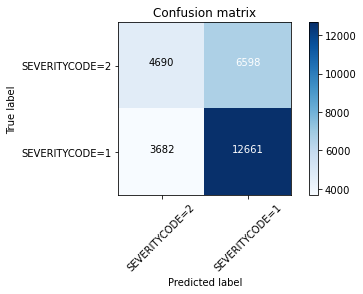

In [40]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['SEVERITYCODE=2','SEVERITYCODE=1'],normalize= False,  title='Confusion matrix')

In [41]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.66      0.77      0.71     16343
           1       0.56      0.42      0.48     11288

    accuracy                           0.63     27631
   macro avg       0.61      0.60      0.59     27631
weighted avg       0.62      0.63      0.62     27631



we have high f1-score for 0's, therefore this model is somewhat accurate at predicting SEVERITYCODE	1s.

## Logistic Regression Model 2
### & Model Evaluation

In [80]:
#now let's remove ADDRTYPE and test logistic regression model again 
encoding_SEVERITYCODE = {'SEVERITYCODE':{1:0, 2:1}}
df_lr2=df_clean.replace(encoding_SEVERITYCODE)
df_lr2=df_lr2.drop(['Alley','Block','Intersection'],axis=1)
df_lr2.head()

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND
0,1,3,4,1
2,0,3,1,1
3,0,1,1,1
4,1,6,4,1
7,1,1,1,1


In [72]:
#Lets define X, and y for our dataset:
X2 = np.asarray(df_lr2.drop(['SEVERITYCODE'],axis=1))
y2 = np.asarray((df_lr2['SEVERITYCODE']))
#normalize the dataset:
from sklearn import preprocessing
X2 = preprocessing.StandardScaler().fit(X2).transform(X2)
#split our dataset into train and test set:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split( X2, y2, test_size=0.2, random_state=4)
print ('Train set:', X_train2.shape,  y_train2.shape)
print ('Test set:', X_test2.shape,  y_test2.shape)

Train set: (110522, 3) (110522,)
Test set: (27631, 3) (27631,)


In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR2 = LogisticRegression(C=0.01, solver='liblinear').fit(X_train2,y_train2)
yhat2 = LR2.predict(X_test2)
yhat2

array([0, 0, 0, ..., 0, 0, 0])

In [67]:
yhat_prob2 = LR2.predict_proba(X_test2)

In [68]:
jaccard_score(y_test2, yhat2)

0.0

In [69]:
log_loss(y_test2, yhat_prob2)

0.6613566724226168

In [70]:
print (classification_report(y_test2, yhat2))

              precision    recall  f1-score   support

           0       0.59      1.00      0.74     20376
           1       0.00      0.00      0.00     14163

    accuracy                           0.59     34539
   macro avg       0.29      0.50      0.37     34539
weighted avg       0.35      0.59      0.44     34539



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion matrix, without normalization
[[    0 14163]
 [    0 20376]]


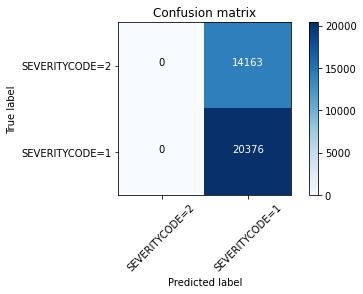

In [71]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test2, yhat2, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['SEVERITYCODE=2','SEVERITYCODE=1'],normalize= False,  title='Confusion matrix')

As we can see, the second model is not as good as the first model.

## Decision Trees Model

In [88]:
encoding_add = {'ADDRTYPE':{'Alley': 1, 'Block': 2, 'Intersection':3}}
df_t=df_balanced.replace(encoding_add)
df_t.drop(['Alley','Block','Intersection'],axis=1,inplace=True)
df_t.head()

,SEVERITYCODE,ADDRTYPE,WEATHER,ROADCOND,LIGHTCOND
0,2,3,3,4,1
2,1,2,3,1,1
3,1,2,1,1,1
4,2,3,6,4,1
7,2,3,1,1,1


In [94]:
Xt = df_t[['WEATHER','ROADCOND','LIGHTCOND','ADDRTYPE']].values
Xt[0:5]

array([[3, 4, 1, 3],
       [3, 1, 1, 2],
       [1, 1, 1, 2],
       [6, 4, 1, 3],
       [1, 1, 1, 3]])

In [95]:
yt = df_balanced["SEVERITYCODE"]

In [96]:
Xt_trainset, Xt_testset, yt_trainset, yt_testset = train_test_split(Xt, yt, test_size=0.3, random_state=3)

In [97]:
from sklearn.tree import DecisionTreeClassifier
Tree= DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [98]:
Tree.fit(Xt_trainset,yt_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [139]:
predTree = Tree.predict(Xt_testset)

#### Evaluation

In [100]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(yt_testset, predTree))

DecisionTrees's Accuracy:  0.6279013656323892


In [102]:
jaccard_score(yt_testset, predTree)

0.5377929628963616

In [104]:
from sklearn.metrics import f1_score
f1_score(yt_testset, predTree, average='weighted')

0.6219398679314988

##### This decision tree seems to be a decent model in comparison to our previously tested models. 

#### Visualization

In [109]:
!pip install pydotplus 

     |████████████████████████████████| 278 kB 1.5 MB/s eta 0:00:01
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24567 sha256=a9422d9bb3e403982fd4ea60eeba85c1b4008ad5a878906ecaefffd2d5d41a4b
  Stored in directory: /Users/annabellewang/Library/Caches/pip/wheels/1e/7b/04/7387cf6cc9e48b4a96e361b0be812f0708b394b821bf8c9c50
Successfully built pydotplus


In [113]:
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline

In [128]:
from matplotlib import pyplot as plt
from sklearn import tree

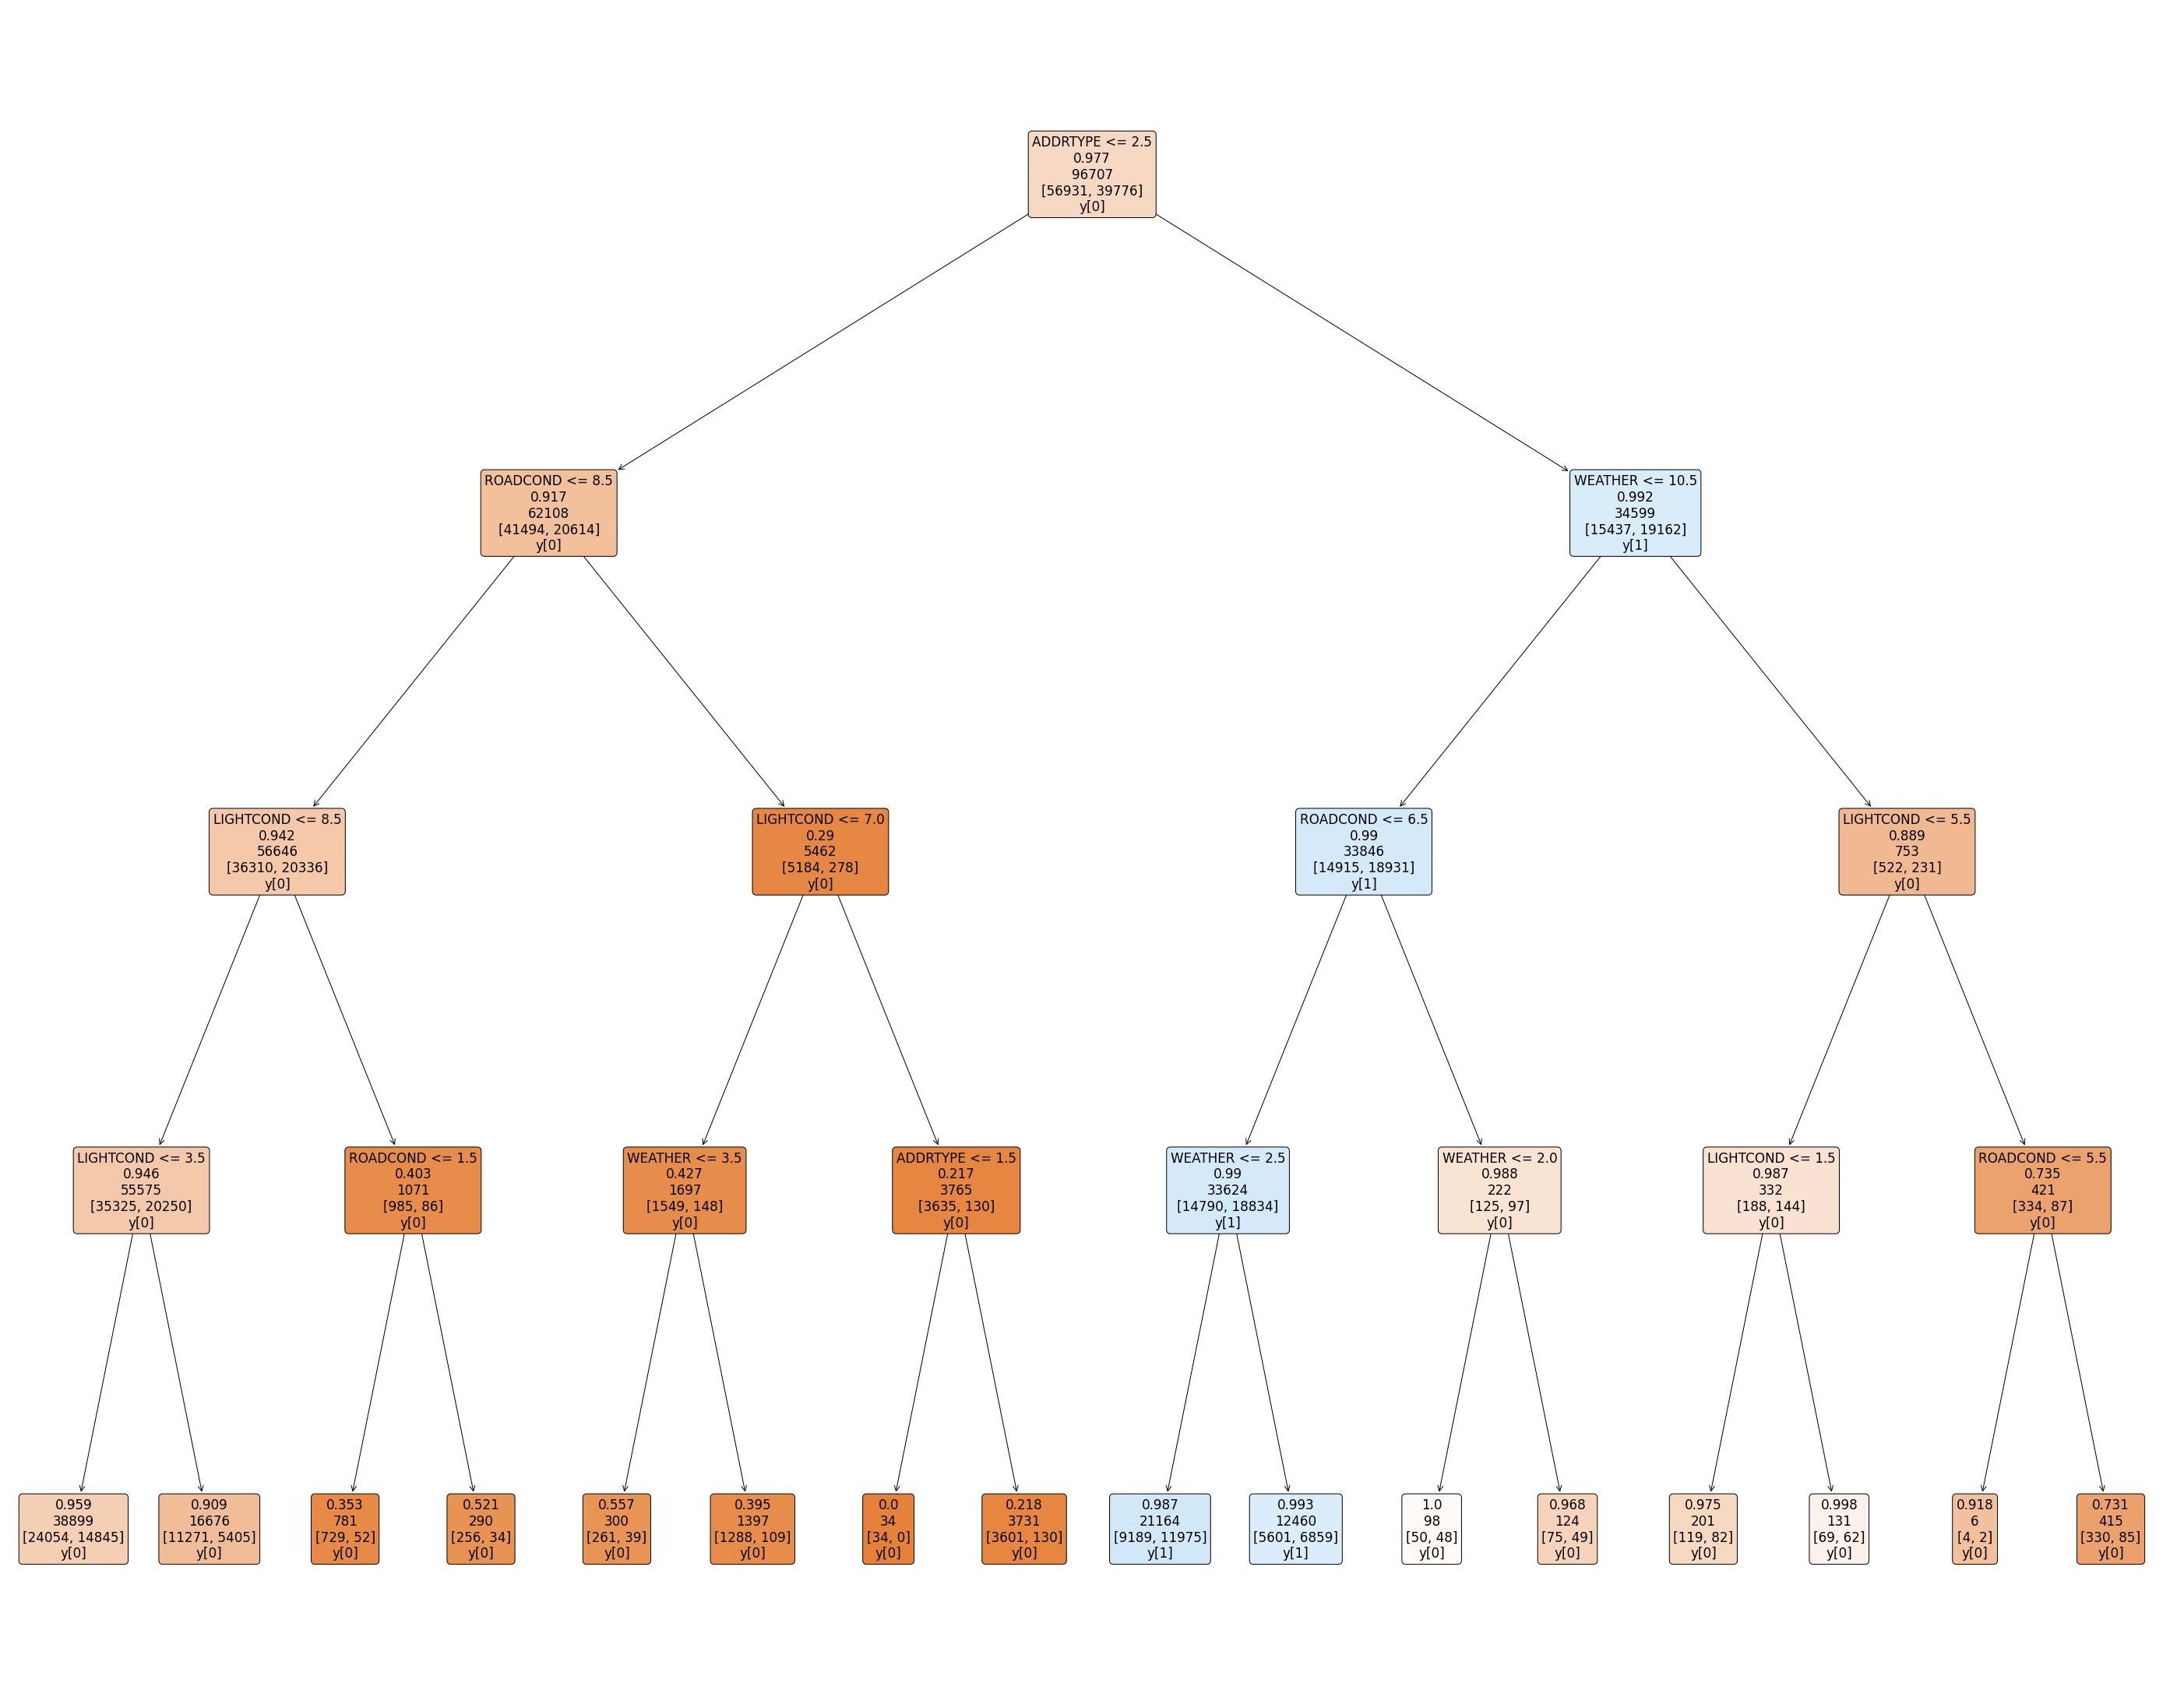

In [142]:
fig = plt.figure(figsize=(50,40))
P = tree.plot_tree(Tree, 
                   feature_names=['WEATHER','ROADCOND','LIGHTCOND','ADDRTYPE'],
                   class_names=True,
                   rounded=True,
                   label=None,
                   proportion=False,
                   filled=True)

## K-Nearest Neighbors Model

In [160]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [161]:
#here we use the same cleaned data set as decision tree model
Xk = df_t[['WEATHER','ROADCOND','LIGHTCOND','ADDRTYPE']].values
Xk[0:5]

array([[3, 4, 1, 3],
       [3, 1, 1, 2],
       [1, 1, 1, 2],
       [6, 4, 1, 3],
       [1, 1, 1, 3]])

In [163]:
yk = df_balanced["SEVERITYCODE"].values
yk

array([2, 1, 1, ..., 2, 2, 2])

In [164]:
#Data Standardization
Xk = preprocessing.StandardScaler().fit(Xk).transform(Xk.astype(float))
X[0:5]

array([[ 0.03,  0.74, -0.64, -0.06, -1.33,  1.34],
       [ 0.03, -0.6 , -0.64, -0.06,  0.75, -0.75],
       [-0.66, -0.6 , -0.64, -0.06,  0.75, -0.75],
       [ 1.06,  0.74, -0.64, -0.06, -1.33,  1.34],
       [-0.66, -0.6 , -0.64, -0.06, -1.33,  1.34]])

In [165]:
#Train Test Split
Xk_train, Xk_test, yk_train, yk_test = train_test_split( Xk, yk, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (110522, 6) (110522,)
Test set: (27631, 6) (27631,)


In [166]:
#Classification
from sklearn.neighbors import KNeighborsClassifier

In [173]:
Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(Xk_train,yk_train)
    ykhat=neigh.predict(Xk_test)
    mean_acc[n-1] = metrics.accuracy_score(yk_test, ykhat)
    
    std_acc[n-1]=np.std(ykhat==yk_test)/np.sqrt(ykhat.shape[0])

mean_acc

array([0.55, 0.59, 0.56, 0.61, 0.58, 0.59, 0.6 , 0.6 , 0.62, 0.61, 0.61,
       0.61, 0.61, 0.6 , 0.6 , 0.6 , 0.6 , 0.6 , 0.6 ])

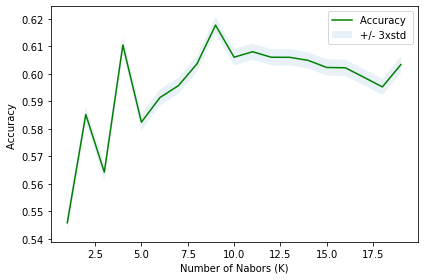

In [174]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [175]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.6176757989215013 with k= 9


In [177]:
neigh1 = KNeighborsClassifier(n_neighbors = 9).fit(Xk_train,yk_train)
neigh1

KNeighborsClassifier(n_neighbors=9)

In [179]:
yhat_b = neigh1.predict(Xk_test)
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(yk_train, neigh.predict(Xk_train)))
print("Test set Accuracy: ", metrics.accuracy_score(yk_test, yhat_b))

Train set Accuracy:  0.6008577477787228
Test set Accuracy:  0.6176757989215013


In [180]:
jaccard_score(yk_test, yhat_b)

0.5330622347949081

In [181]:
f1_score(yk_test, yhat_b, average='weighted')

0.6101271571325385

##### Therefore, this KNN model seems to be a decent model in comparison to our previously tested models as well

### 6 different machine learning models were built and tested in this project. According to the test results, the Decision Tree Model would be the best model to implement in this case, followed by the KNN Classification Model.